In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

In [301]:
# Clean up warnings for presentation

import warnings
warnings.filterwarnings("ignore")

In [302]:
# Read in tinder data file

tinder = pd.read_csv('../data/tinder_posts.csv')

In [303]:
# View first five rows of data frame

tinder.head()

,title,author,created_utc,selftext,subreddit,body
0,Good to know what ur kinks are 😒,HotwifeNora,1627046397,NaN,Tinder,NaN
1,How can I recover my account or make a new one...,Ethan21162,1627045468,I’ve lost my account and gotten it banned as w...,Tinder,NaN
2,what would a funny or witty response be?,ineedanswersasapplz,1627044247,NaN,Tinder,NaN
3,Swipe left or right?,Amysleeman442,1627043517,NaN,Tinder,NaN
4,Is that a friendzone redflag?,Texas_Shepard,1627042563,NaN,Tinder,NaN


In [304]:
# Check for nulls

tinder.isnull().sum()

title          5000
author            0
created_utc       0
selftext       8867
subreddit         0
body           5600
dtype: int64

In [305]:
# View size of data frame

tinder.shape

(10600, 6)

In [306]:
# Check the data types of the fields

tinder.dtypes

title          object
author         object
created_utc     int64
selftext       object
subreddit      object
body           object
dtype: object

In [307]:
# Read in bumble data file

bumble = pd.read_csv('../data/bumble_posts.csv')

In [308]:
# View first five rows of data frame

bumble.head()

,title,author,created_utc,selftext,subreddit,body
0,Where do I sign up.,Revolutionary-Line44,1627047507,NaN,Bumble,NaN
1,"""Thirst trap says wha?""",salex100m,1627045789,NaN,Bumble,NaN
2,I am mortified… caught snooping?,Grey_Violet,1627045461,Hello fellow Bumblers. So I’ve (F/31) messed u...,Bumble,NaN
3,"Hey, I’m looking for Syndey",MedievalFootfare,1627044758,NaN,Bumble,NaN
4,Am I doing this right,Sunshine_Prophylaxis,1627044454,NaN,Bumble,NaN


In [309]:
# Check for nulls

bumble.isnull().sum()

title          5000
author            0
created_utc       0
selftext       7476
subreddit         0
body           5100
dtype: int64

In [310]:
# View size of data frame

bumble.shape

(10100, 6)

In [311]:
# Check the data types of the fields

bumble.dtypes

title          object
author         object
created_utc     int64
selftext       object
subreddit      object
body           object
dtype: object

In [312]:
# Clean data frames: remove nulls, '[deleted]', '[removed]' and combine text into one column and remove punctuation

def clean_files(df):
    self_text_only = df[['selftext']]
    self_text_only = self_text_only.dropna()
    self_text_only = self_text_only[self_text_only['selftext'] != '[removed]']
    self_text_only = self_text_only[self_text_only['selftext'] != '[deleted]']
    body_only = df[['body']]
    body_only = body_only.dropna()
    body_only = body_only[body_only['body'] != '[removed]']
    body_only = body_only[body_only['body'] != '[deleted]']
    title_only = df[['title']]
    title_only = title_only.dropna()
    
    # Turn all text data into one text column
    self_text_only.rename(columns = {'selftext':'text'}, inplace = True)
    body_only.rename(columns = {'body':'text'}, inplace = True)
    title_only.rename(columns = {'title':'text'}, inplace = True)
    
    # Concatenate all of the text into one column
    words = [self_text_only, body_only, title_only]
    text = pd.concat(words, axis = 0)
    text['text'] = text['text'].str.replace('[^\w\s]','')
    
    text['subreddit'] = df['subreddit']
    
    return text

In [313]:
# Run the cleaning function on the tinder file

clean_tinder = clean_files(tinder)

In [314]:
clean_tinder.head()

,text,subreddit
1,Ive lost my account and gotten it banned as we...,Tinder
5,Even after girls numbers you still have to to ...,Tinder
6,i went on 1 date with her we just talked etc d...,Tinder
19,I have been on tinder for a while now \nI matc...,Tinder
23,Ive had tinder for about a month and Im not su...,Tinder


In [315]:
# Run the cleaning function on the bumble file

clean_bumble = clean_files(bumble)

In [316]:
clean_bumble.head()

,text,subreddit
2,Hello fellow Bumblers So Ive F31 messed up Mat...,Bumble
7,Using Bumble for 4 months and saw my report Ye...,Bumble
9,Im a Christian because its who I am not what I...,Bumble
10,I still try to make sense of dating apps My ne...,Bumble
11,Just wanted to know because i havent tried thi...,Bumble


In [317]:
# Count vectorize tinder data
X_tinder = clean_tinder['text']

stop_word_list = ['to', 'the', 'and', 'you', 'it', 'of', 'that', 'is', 'on', 'my', 'in', 'for', 'this', 'with', 
                  'but', 'me', 'not', 'have', 'just', 'if', 'so', 'like', 'or', 'are', 'be', 'what', 'was', 'your', 
                  'they', 'do', 'she', 'get', 'can', 'people', 'about', 'as', 'he', 'out', 'profile', 'how', 'up', 
                  'all', 'her', 'we', 'one', 'at', 'no', 'there', 'when', 'would', 'who', 'know', 'from',  'time', 
                  'them', 'think', 'more', 'some', 'had', 'an', 'good', 'someone', 'then', 'because', 'any', 'don',
                  're', 've', 'right', 'matches', 'why', 'first', 'really', 'see', 'want', 'even', 'women', 'been', 
                  'im', 'dont', 'its', 'ive', 'only', 'date', 'now', 'youre', 'am', 'something', 'has']

cvec = CountVectorizer(stop_words = stop_word_list)

X_tinder_cv = cvec.fit_transform(X_tinder)

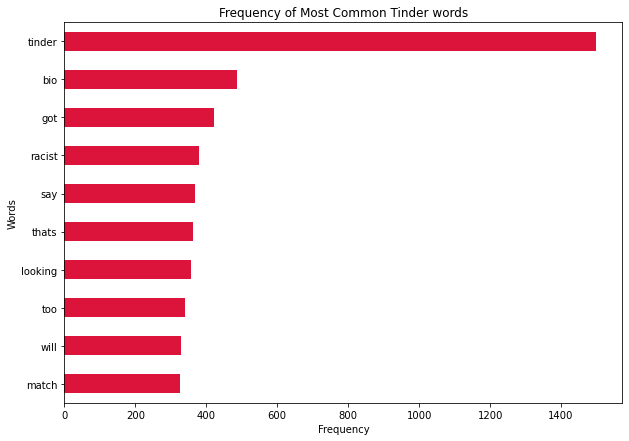

In [318]:
# Convert tinder words to dataframe

X_tinder_cv_df = pd.DataFrame(X_tinder_cv.todense(), columns = cvec.get_feature_names())

# Plot most frequent words

plt.figure(figsize = (10, 7))

X_tinder_cv_df.sum().sort_values().tail(10).plot(kind = 'barh', color = 'crimson')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Frequency of Most Common Tinder words')
plt.savefig('../images/tinder_words.png');

In [319]:
# List of most common tinder words

tinder_common_list = list(X_tinder_cv_df.sum().sort_values(ascending = False).head(20).index)

In [320]:
# Count vectorize bumble data
X_bumble = clean_bumble['text']

stop_word_list = ['to', 'the', 'and', 'you', 'it', 'of', 'that', 'is', 'on', 'my', 'in', 'for', 'this', 'with', 
                  'but', 'me', 'not', 'have', 'just', 'if', 'so', 'like', 'or', 'are', 'be', 'what', 'was', 'your', 
                  'they', 'do', 'she', 'get', 'can', 'people', 'about', 'as', 'he', 'out', 'profile', 'how', 'up', 
                  'all', 'her', 'we', 'one', 'at', 'no', 'there', 'when', 'would', 'who', 'know', 'from',  'time', 
                  'them', 'think', 'more', 'some', 'had', 'an', 'good', 'someone', 'then', 'because', 'any', 'don',
                 're', 've', 'right', 'matches', 'why', 'first', 'really', 'see', 'want', 'even', 'women', 'been',
                 'im', 'dont', 'its', 'ive', 'only', 'date', 'now', 'youre', 'am', 'something', 'has']

cvec = CountVectorizer(stop_words = stop_word_list)

X_bumble_cv = cvec.fit_transform(X_bumble)

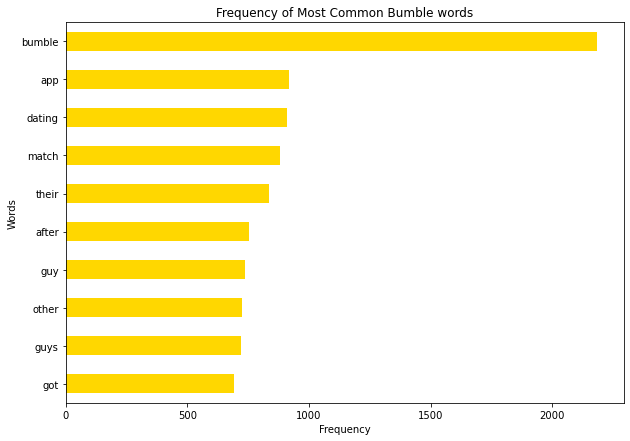

In [321]:
# Convert bumble words to dataframe

X_bumble_cv_df = pd.DataFrame(X_bumble_cv.todense(), columns = cvec.get_feature_names())

# Plot most frequent words

plt.figure(figsize = (10, 7))

X_bumble_cv_df.sum().sort_values().tail(10).plot(kind = 'barh', color = 'gold')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Frequency of Most Common Bumble words')
plt.savefig('../images/bumble_words.png');

In [322]:
# List of most common bumble words

bumble_common_list = list(X_bumble_cv_df.sum().sort_values(ascending = False).head(20).index)

In [323]:
# Remove the words that are common in both list to create a better list of stop words

for word in bumble_common_list:
    if word not in tinder_common_list:
        print(word)

bumble
app
dating
guy
other
back
person
never
him
message


In [324]:
# Combine both files into one data set

files = [clean_tinder, clean_bumble]

combined = pd.concat(files, axis = 0, ignore_index=True)

In [325]:
combined

,text,subreddit
0,Ive lost my account and gotten it banned as we...,Tinder
1,Even after girls numbers you still have to to ...,Tinder
2,i went on 1 date with her we just talked etc d...,Tinder
3,I have been on tinder for a while now \nI matc...,Tinder
4,Ive had tinder for about a month and Im not su...,Tinder
...,...,...
22901,Yeah I feel like Im pretty corky tbh,Bumble
22902,Does this app give you fake likes,Bumble
22903,Why no responses,Bumble
22904,Another lass enjoying all bumble has to offer,Bumble


In [326]:
# View the probability of picking one or the other by chance (null model)

combined['subreddit'].value_counts(normalize = True)

Bumble    0.519165
Tinder    0.480835
Name: subreddit, dtype: float64

In [327]:
# Turn Tinder and Bumble into 1 and 0 for modeling

combined['subreddit'] = combined['subreddit'].map({'Tinder': 1, 'Bumble': 0})

In [328]:
combined.head()

,text,subreddit
0,Ive lost my account and gotten it banned as we...,1
1,Even after girls numbers you still have to to ...,1
2,i went on 1 date with her we just talked etc d...,1
3,I have been on tinder for a while now \nI matc...,1
4,Ive had tinder for about a month and Im not su...,1


In [329]:
combined.shape

(22906, 2)

In [330]:
# Create a column to store the length of the posts

# Create empty list to store the lengths
post_length = []

# For each post capture the length in the new list
for i in range(0, combined.shape[0]):
    length = len(combined['text'][i])
    post_length.append(length)

# Assign the new column to the length list
combined['post_length'] = post_length

In [331]:
combined[combined['post_length'] == 1]

,text,subreddit,post_length
829,D,1,1
898,X,1,1
1140,D,1,1
1919,O,1,1
1988,P,1,1
2054,f,1,1
2555,D,1,1
2971,D,1,1
2979,a,1,1
3987,2,1,1


In [332]:
# Drop posts where the post is just 1 character

combined = combined[combined['post_length'] > 1]

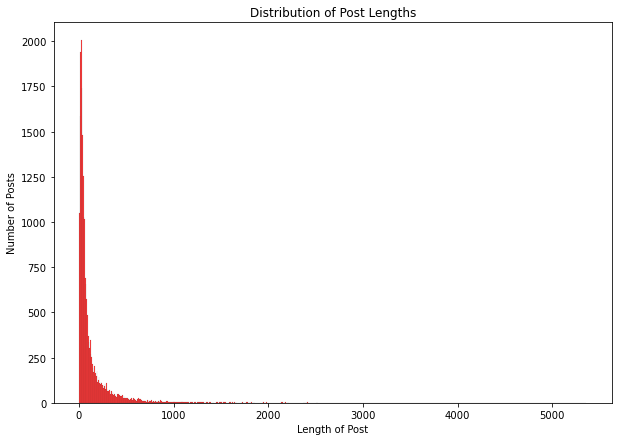

In [333]:
# Visualize the distribution of the posts

plt.figure(figsize = (10, 7))

sns.histplot(combined['post_length'], color = 'red')
plt.title('Distribution of Post Lengths')
plt.xlabel('Length of Post')
plt.ylabel('Number of Posts');

In [334]:
combined.to_csv('../data/combined_clean.csv', index = False)